In [78]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [79]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [80]:
df.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [81]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [83]:
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [84]:
#Display number missing values per column
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [85]:
# check columns types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [86]:
# Check outliers.


## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Dealing with outliers:

In [87]:
categorical_features = ['team', 'position']

numeric_features = ['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']

In [88]:
for i in categorical_features:
    print(df[i].value_counts())


team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [89]:
for i in numeric_features:
    print(df[i].value_counts())


height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

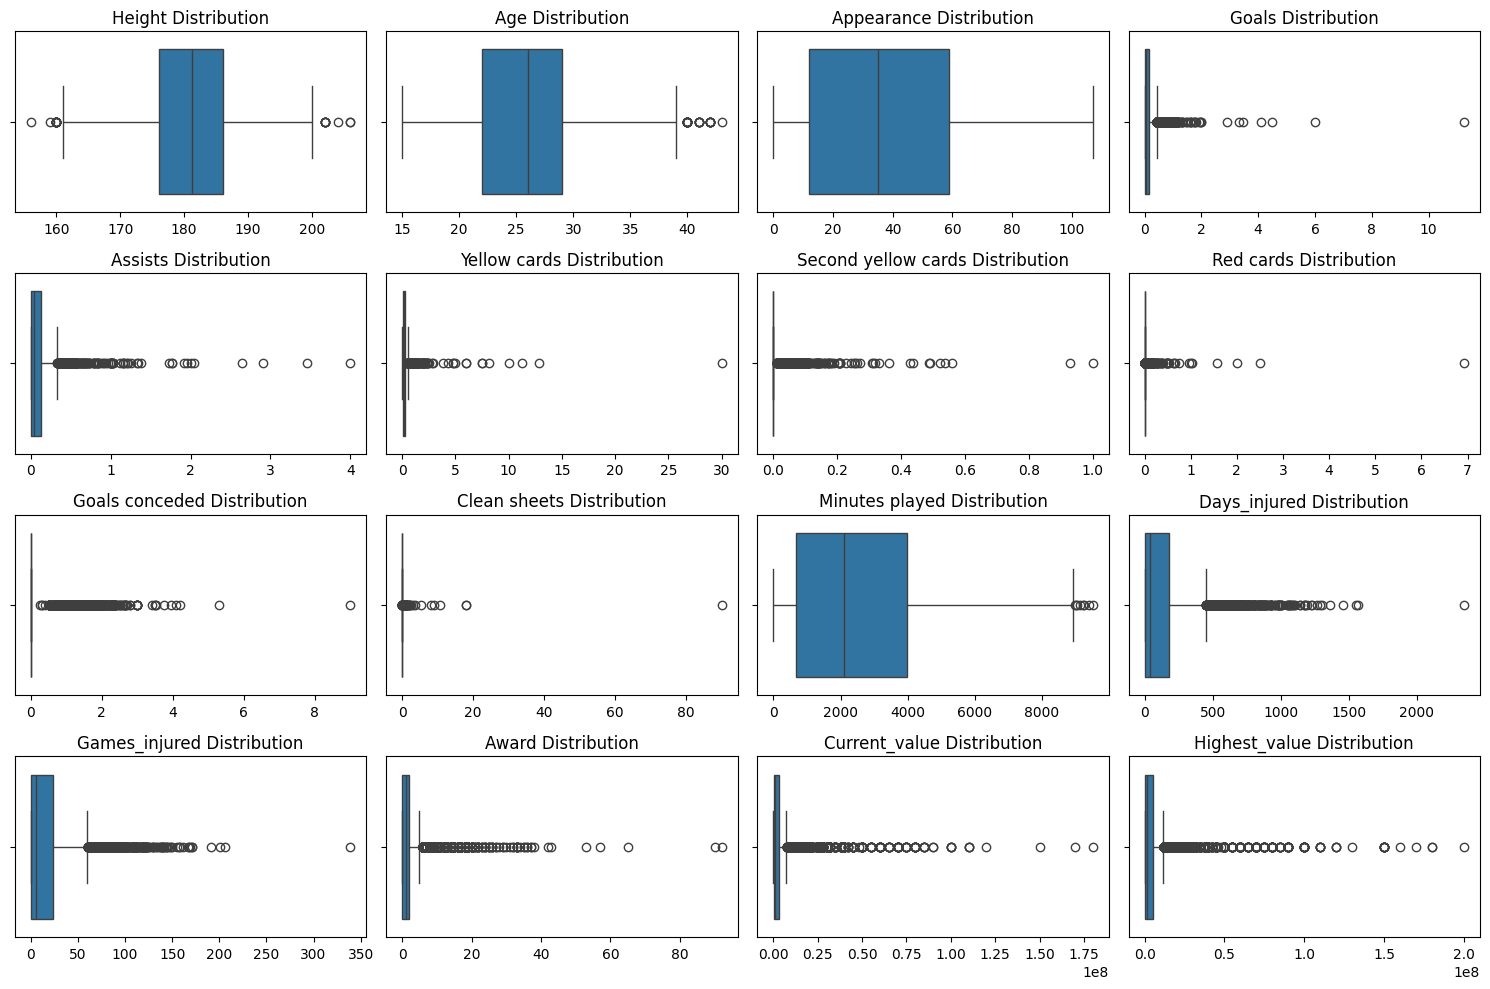

In [90]:
# List of columns to analyze
columns_to_analyze = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured', 'award',
    'current_value', 'highest_value'
]

# Plotting box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [91]:
# List of columns to analyze for outliers
columns_to_analyze = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured', 'award',
    'current_value', 'highest_value'
]

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 7.5 * IQR

        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the specified columns
df_cleaned = remove_outliers(df, columns_to_analyze)

# Display the shape of the original and cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (10754, 22)
Cleaned DataFrame shape: (9537, 22)


## 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [92]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

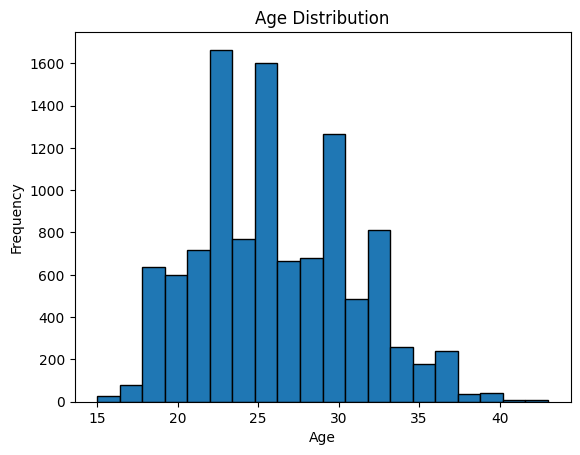

In [93]:
import matplotlib.pyplot as plt

# Univariate Analysis
df['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


**Categorical & Categorical --> (Stacked Column Chart)**

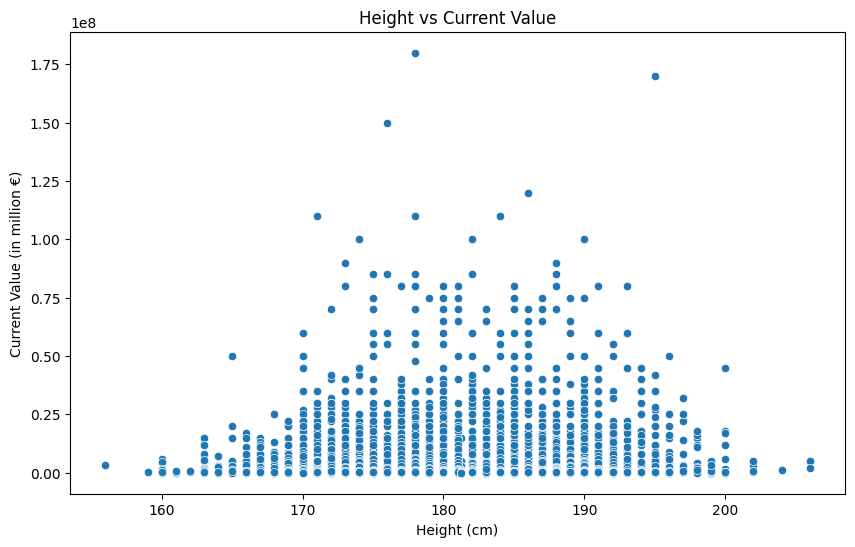

In [94]:
import seaborn as sns

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='current_value')
plt.title('Height vs Current Value')
plt.xlabel('Height (cm)')
plt.ylabel('Current Value (in million €)')
plt.show()


We could also use a correlation matrix to get more specific information about the relationship between these two variables.

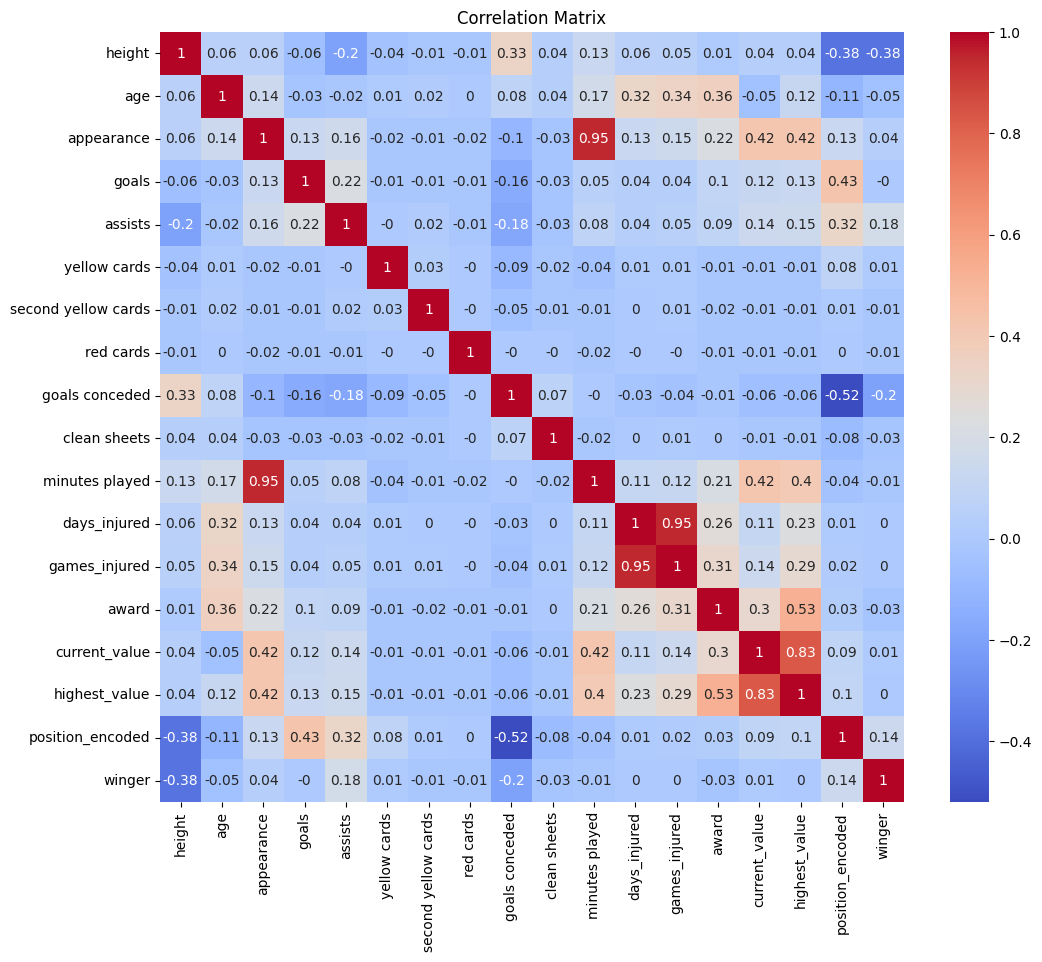

In [95]:
# Selecting relevant numerical columns for correlation analysis
numerical_columns = ['age', 'height', 'appearance', 'goals', 'assists', 'yellow cards',
                     'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
                     'minutes played', 'days_injured', 'games_injured', 'current_value', 'highest_value']

plt.figure(figsize=(12, 10))
sns.heatmap(round(df[numeric_features].corr(),2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [96]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


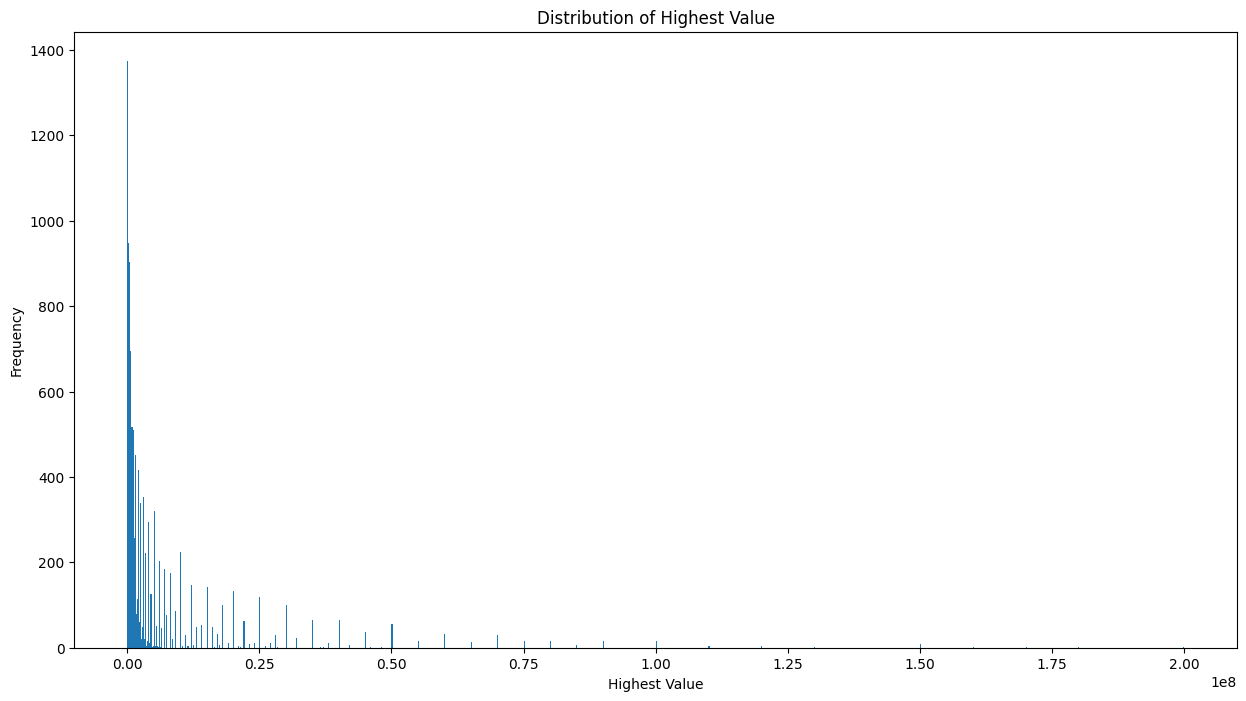

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.hist(df['highest_value'], bins=1000)
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.title('Distribution of Highest Value')
plt.show()


## Features Engineering:

In [98]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


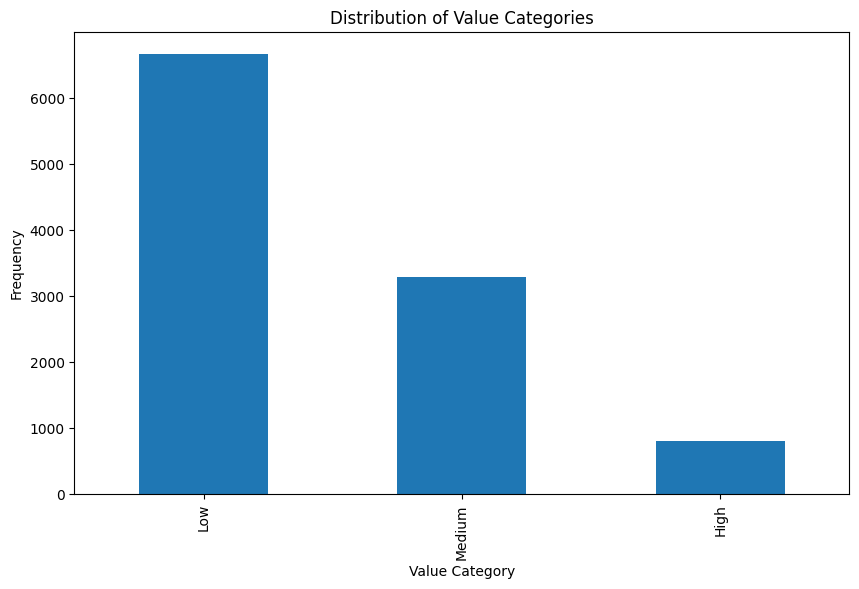

In [99]:
# Define the bins (thresholds) and corresponding labels
bins = [-1, 2500000, 20000000, np.inf]   # split the highest_value into three categories, start from -1 to include the zeros
labels = ['Low', 'Medium', 'High']

# Create a new column 'value_category' with the categorized data
df['value_category'] = pd.cut(df['highest_value'], bins=bins, labels=labels)

df.drop('highest_value', axis=1, inplace=True)

# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
df['value_category'].value_counts().plot(kind='bar')
plt.xlabel('Value Category')
plt.ylabel('Frequency')
plt.title('Distribution of Value Categories')
plt.show()


In [100]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,position_encoded,winger,value_category
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,1,0,High
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,1,0,High
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,1,0,Medium
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,2,0,High
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,2,0,High


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               10754 non-null  object  
 1   team                 10754 non-null  object  
 2   name                 10754 non-null  object  
 3   position             10754 non-null  object  
 4   height               10754 non-null  float64 
 5   age                  10754 non-null  float64 
 6   appearance           10754 non-null  int64   
 7   goals                10754 non-null  float64 
 8   assists              10754 non-null  float64 
 9   yellow cards         10754 non-null  float64 
 10  second yellow cards  10754 non-null  float64 
 11  red cards            10754 non-null  float64 
 12  goals conceded       10754 non-null  float64 
 13  clean sheets         10754 non-null  float64 
 14  minutes played       10754 non-null  int64   
 15  days_injured       

In [102]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,4.000000,1.000000


In [103]:
# Convert 'value_category' to numeric values
label_encoder = LabelEncoder()
df['value_category_encoded'] = label_encoder.fit_transform(df['value_category'])

In [104]:
df['value_category'].unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [105]:
df['value_category_encoded'].value_counts()

value_category_encoded
1    6664
2    3287
0     803
Name: count, dtype: int64

In [106]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['value_category_encoded'].sort_values(ascending=False))

value_category_encoded    1.000000
age                       0.100958
days_injured              0.092686
games_injured             0.085659
appearance                0.070951
minutes played            0.061124
yellow cards              0.018134
position_encoded          0.017206
height                    0.016156
second yellow cards       0.015384
assists                   0.011613
goals                     0.010841
clean sheets              0.007551
winger                    0.006039
red cards                -0.000917
goals conceded           -0.020710
award                    -0.085508
current_value            -0.252208
Name: value_category_encoded, dtype: float64


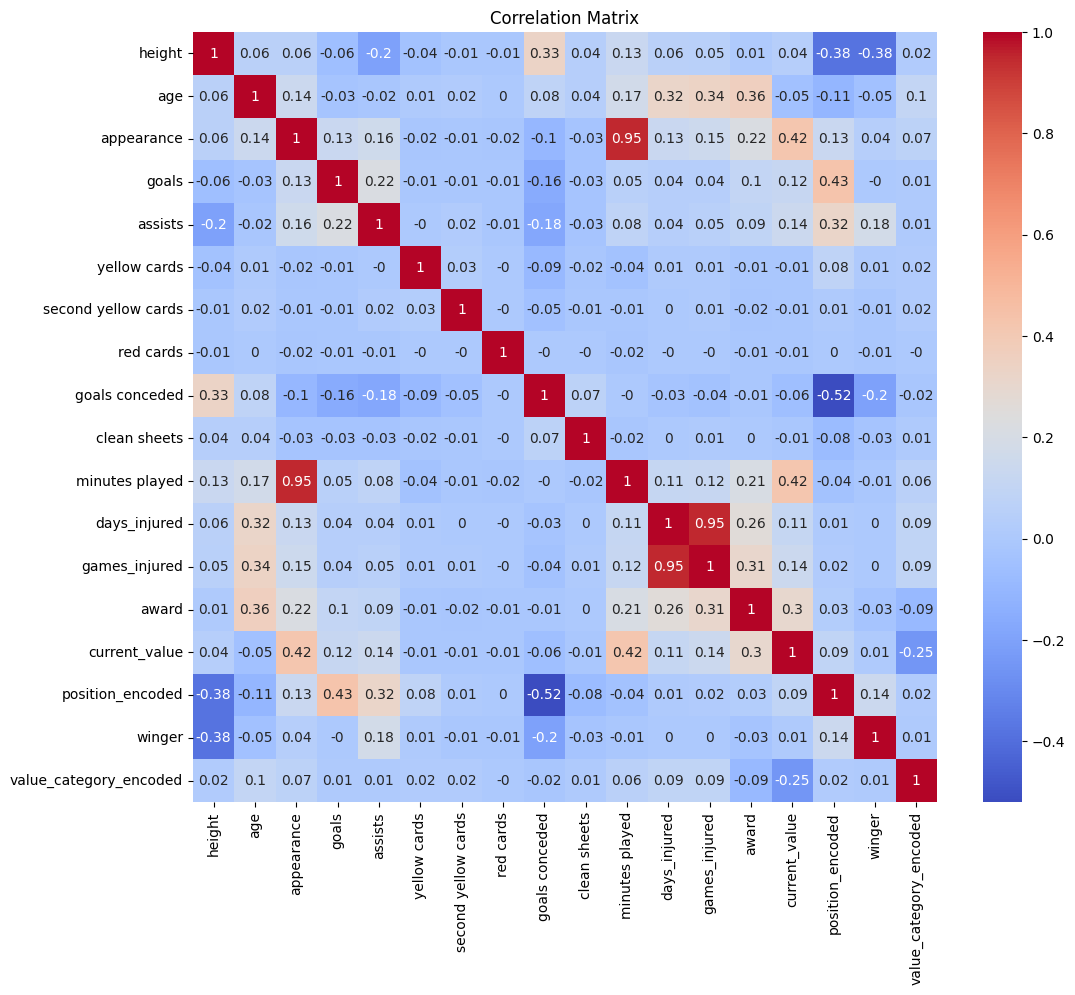

In [107]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(round(correlation, 2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [306]:
# Set the correlation threshold
threshold = 0.05  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['value_category_encoded']) > threshold]['value_category_encoded'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'value_category_encoded'],
      dtype='object')

In [307]:
df_treated_selected = df[selected_features]


In [308]:
# Prepare data
X = df_treated_selected.drop(['value_category_encoded'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [309]:
X

,age,appearance,minutes played,days_injured,games_injured,award,current_value
0,32.0,104,9390,42,5,13,15000000
1,30.0,15,1304,510,58,1,1500000
2,37.0,4,292,697,84,4,600000
3,25.0,82,6408,175,22,9,50000000
4,30.0,63,5031,238,51,21,40000000
...,...,...,...,...,...,...,...
10749,20.0,16,1023,0,0,0,75000
10750,24.0,26,1449,102,18,0,300000
10751,19.0,20,960,0,0,0,50000
10752,20.0,17,865,0,0,0,50000


In [310]:
X_scaled.shape

(10754, 7)

## Building the model :

In [44]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 7

In [45]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [46]:
#indices
distances[:,min_samples-1]

array([2.05086498, 0.5832144 , 1.14376016, ..., 0.14324919, 0.10021752,
       0.22755408])

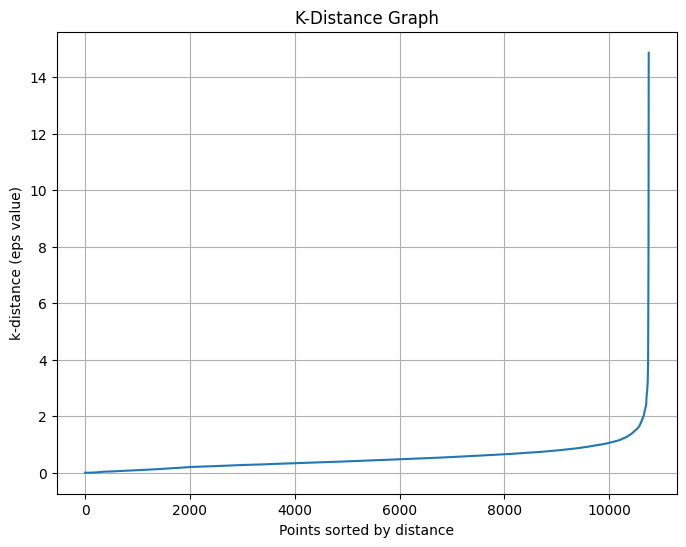

In [49]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

# Create a Plotly figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(
    y=k_dist_sorted,
    mode='lines',
    name='k-distance (eps value)'
))

# Update the layout
fig.update_layout(
    title='K-Distance Graph',
    xaxis_title='Points sorted by distance',
    yaxis_title='k-distance (eps value)',
    template='plotly_white',
    width=800,
    height=600
)

# Show the plot
fig.show()



In [179]:
# 4. Apply DBSCAN with chosen epslon and min_samples
# Typically, we choose eps at the "elbow" point in this plot, where the slope changes significantly, which is almost 1.6 in this problem.
chosen_eps = 1.6
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train and test the Model


In [180]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)

In [181]:
pd.Series(clusters).value_counts()


 0    10733
-1       21
Name: count, dtype: int64

## Evaluating the Model


In [182]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.9172121657131123

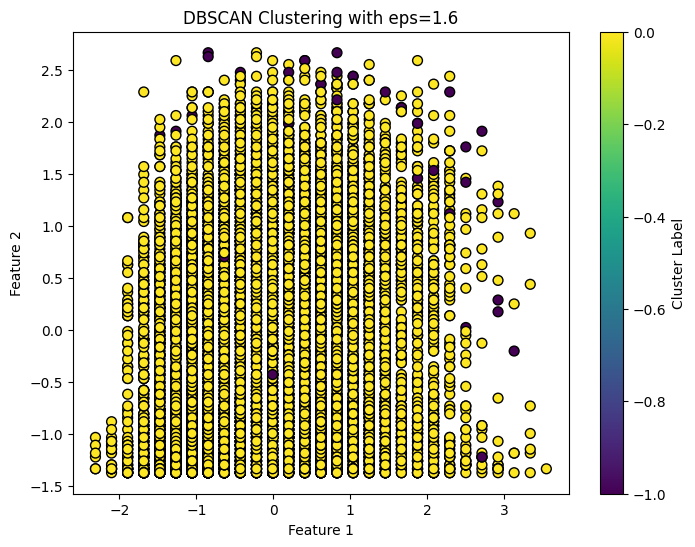

In [56]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [58]:
X['dbscan'] = clusters
X['dbscan'].value_counts()


dbscan
 0    10646
-1      108
Name: count, dtype: int64

<Axes: xlabel='appearance', ylabel='current_value'>

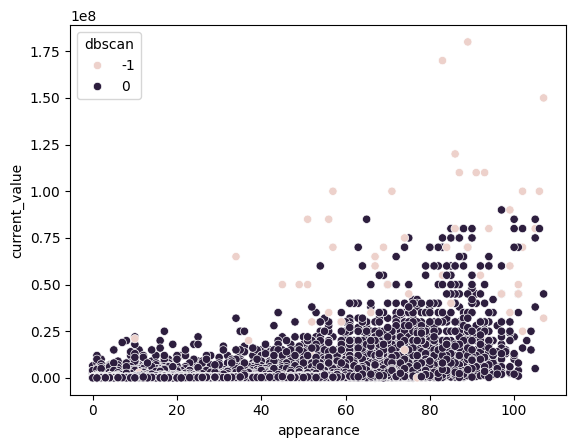

In [59]:
sns.scatterplot(data = X , x = 'appearance', y = 'current_value', hue = 'dbscan')

<Axes: xlabel='age', ylabel='games_injured'>

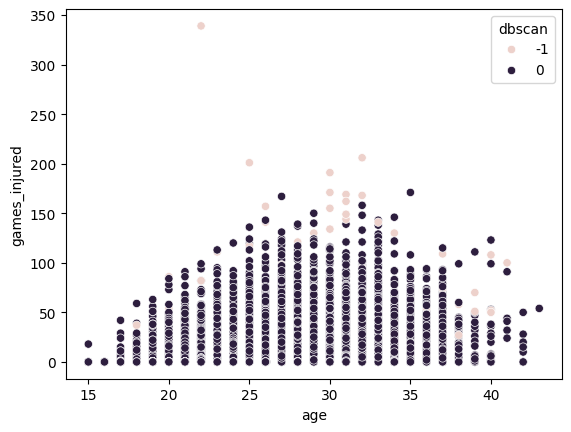

In [60]:
sns.scatterplot(data = X , x = 'age', y = 'games_injured', hue = 'dbscan')


<Axes: xlabel='days_injured', ylabel='current_value'>

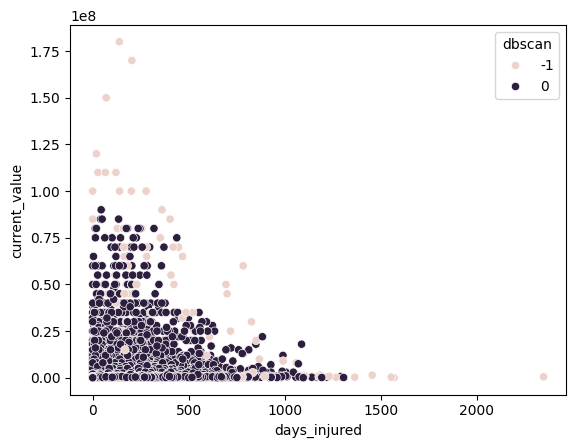

In [61]:
sns.scatterplot(data = X , x = 'days_injured', y = 'current_value', hue = 'dbscan')


## Now Using only three features :

In [315]:
selected_features = ['age', 'appearance', 'current_value']

In [316]:
df_selected = df[selected_features]


In [317]:
# Prepare data
X = df_selected


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [318]:
X_scaled.shape

(10754, 3)

## Buildin the model using three features :

In [319]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 50

In [320]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [321]:
#indices
distances[:,min_samples-1]

array([1.0702266 , 0.14486354, 0.23893376, ..., 0.21270427, 0.15079938,
       0.23983331])

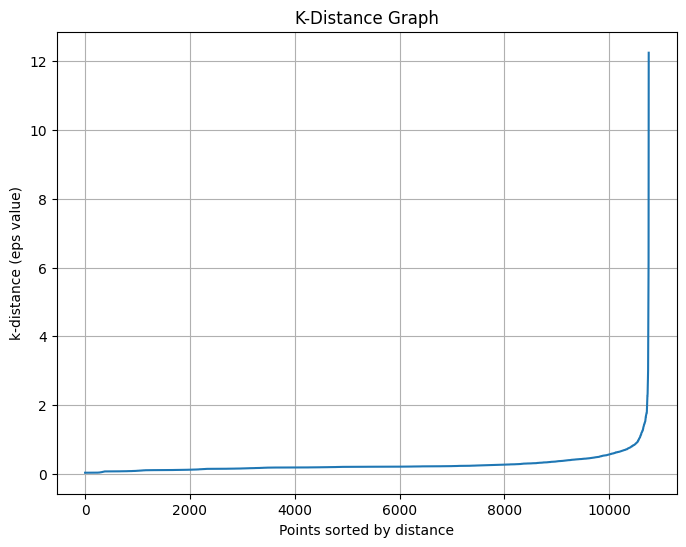

In [322]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

# Create a Plotly figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(
    y=k_dist_sorted,
    mode='lines',
    name='k-distance (eps value)'
))

# Update the layout
fig.update_layout(
    title='K-Distance Graph',
    xaxis_title='Points sorted by distance',
    yaxis_title='k-distance (eps value)',
    template='plotly_white',
    width=800,
    height=600
)

# Show the plot
fig.show()


## Train and test the Model


In [360]:
# 4. Apply DBSCAN with chosen epslon and min_samples
# Typically, we choose eps at the "elbow" point in this plot, where the slope changes significantly, which is almost 0.7 in this problem.
chosen_eps = 0.9
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [361]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)
pd.Series(clusters).value_counts()


 0    10642
-1      112
Name: count, dtype: int64

## Evaluating the Model


In [362]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.9193019215488549

In this analysis, the DBSCAN clustering algorithm was applied to a dataset with the aim of identifying distinct clusters. The parameters chosen were an epsilon (eps) of 0.9, determined based on the "elbow" method, and a pre-defined minimum number of samples (min_samples). The results showed that DBSCAN identified one main cluster containing 10,642 points and 112 noise points, which are points that do not belong to any cluster. The silhouette score, a measure of cluster quality, was 0.9193, indicating well-defined and well-separated clusters.

The presence of only one significant cluster suggests that the dataset is highly homogeneous, meaning the points are very similar to each other, leading DBSCAN to group them into a single cluster. Alternatively, the chosen eps value might be too large, causing most points to be included in one cluster. This outcome could also reflect the intrinsic characteristics of the data, where the natural structure forms one dense region. Adjusting the eps and min_samples values could potentially reveal more clusters, but the current results indicate a strong clustering performance with a high silhouette score.

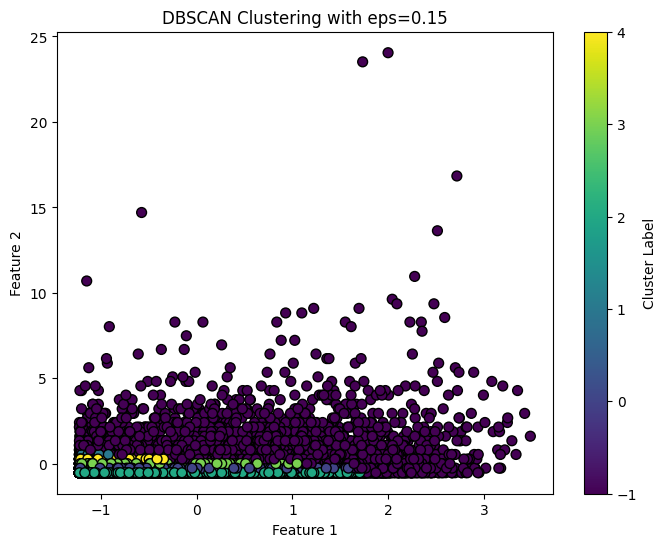

In [305]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [368]:
X['dbscan'] = clusters
X['dbscan'].value_counts()

dbscan
 0    10642
-1      112
Name: count, dtype: int64

<Axes: xlabel='appearance', ylabel='current_value'>

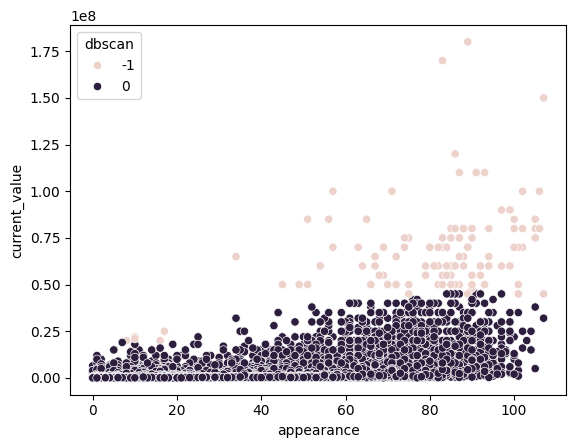

In [370]:
# columns : appearance,	age, current_value

sns.scatterplot(data = X , x = 'appearance', y = 'current_value', hue = 'dbscan')

<Axes: xlabel='age', ylabel='current_value'>

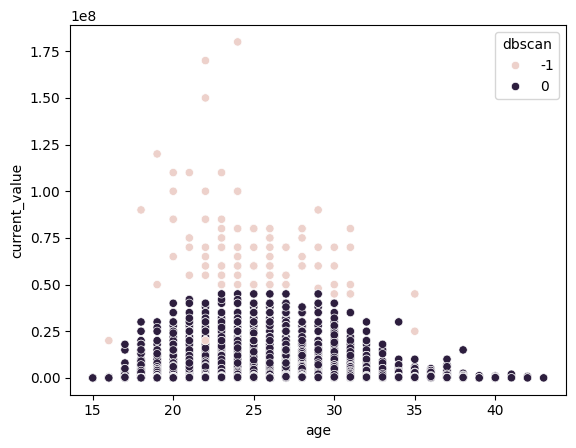

In [371]:
sns.scatterplot(data = X , x = 'age', y = 'current_value', hue = 'dbscan')

<Axes: xlabel='age', ylabel='appearance'>

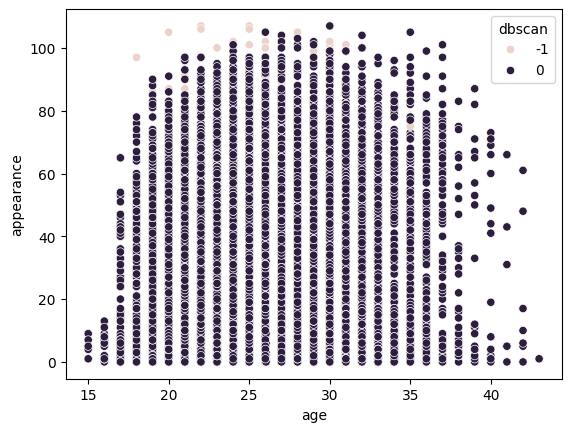

In [373]:
sns.scatterplot(data = X , x = 'age', y = 'appearance', hue = 'dbscan')